### 코로나 데이터로 시계열 분석용 데이터 만들기 

- 데이터 출처: https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting/notebook
- 특정 지역 선택 
- 결측값 확인(존재시 보간법)
- csv파일로 저장 (시계열분석은 R에서 진행 )

- 하단에 분석용 R코드 추가하였음 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

from IPython.display import Image

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/YoonHanho/adp_r/main/covid_19_data.csv')
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
98247,98248,08/29/2020,Zaporizhia Oblast,Ukraine,2020-08-30 04:28:22,1520.0,25.0,883.0
98248,98249,08/29/2020,Zeeland,Netherlands,2020-08-30 04:28:22,1048.0,72.0,0.0
98249,98250,08/29/2020,Zhejiang,Mainland China,2020-08-30 04:28:22,1277.0,1.0,1268.0
98250,98251,08/29/2020,Zhytomyr Oblast,Ukraine,2020-08-30 04:28:22,3155.0,61.0,1837.0
98251,98252,08/29/2020,Zuid-Holland,Netherlands,2020-08-30 04:28:22,18774.0,1344.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 8 columns):
SNo                98252 non-null int64
ObservationDate    98252 non-null object
Province/State     67099 non-null object
Country/Region     98252 non-null object
Last Update        98252 non-null object
Confirmed          98252 non-null float64
Deaths             98252 non-null float64
Recovered          98252 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
df['Country/Region'].value_counts().head()

US                10906
Russia             7592
Mainland China     6849
Japan              4682
Mexico             3347
Name: Country/Region, dtype: int64

In [9]:
df[df['Country/Region']=='US']['Province/State'].value_counts().head()

Washington    183
Illinois      180
California    179
Arizona       179
Maine         173
Name: Province/State, dtype: int64

In [45]:
cal = df[df['Province/State']=='California']
cal

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
204,205,01/26/2020,California,US,1/26/20 16:00,2.0,0.0,0.0
251,252,01/27/2020,California,US,1/27/20 23:59,2.0,0.0,0.0
302,303,01/28/2020,California,US,1/28/20 23:00,2.0,0.0,0.0
354,355,01/29/2020,California,US,1/29/20 19:30,2.0,0.0,0.0
409,410,01/30/2020,California,US,1/30/20 16:00,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
94785,94786,08/25/2020,California,US,2020-08-26 04:28:11,681032.0,12382.0,0.0
95527,95528,08/26/2020,California,US,2020-08-27 04:28:15,687004.0,12532.0,0.0
96269,96270,08/27/2020,California,US,2020-08-28 04:28:11,691821.0,12677.0,0.0
97011,97012,08/28/2020,California,US,2020-08-29 04:28:19,697385.0,12805.0,0.0


In [46]:
cal['date'] = pd.to_datetime(cal['ObservationDate'])
cal = cal[['date', 'Confirmed', 'Deaths']]
cal.head(10)

C:\Users\hanho\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,Confirmed,Deaths
204,2020-01-26,2.0,0.0
251,2020-01-27,2.0,0.0
302,2020-01-28,2.0,0.0
354,2020-01-29,2.0,0.0
409,2020-01-30,2.0,0.0
476,2020-01-31,2.0,0.0
4553,2020-03-10,144.0,2.0
4758,2020-03-11,177.0,3.0
4972,2020-03-12,221.0,4.0
5328,2020-03-13,282.0,4.0


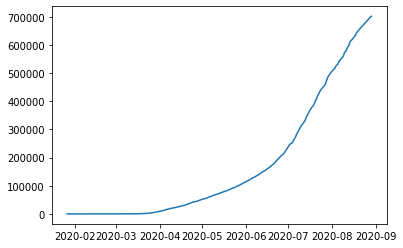

In [47]:
plt.plot(cal['date'], cal['Confirmed']) # 누적수치 -> 일변환    

In [21]:
pd.date_range?

In [48]:
date_mast = pd.DataFrame({'date':pd.date_range(start='1/26/2020', end='8/29/2020')})
date_mast = date_mast.merge(cal, how='left', on='date')
date_mast.head(10)

,date,Confirmed,Deaths
0,2020-01-26,2.0,0.0
1,2020-01-27,2.0,0.0
2,2020-01-28,2.0,0.0
3,2020-01-29,2.0,0.0
4,2020-01-30,2.0,0.0
5,2020-01-31,2.0,0.0
6,2020-02-01,NaN,NaN
7,2020-02-02,NaN,NaN
8,2020-02-03,NaN,NaN
9,2020-02-04,NaN,NaN


In [49]:
cal = date_mast.fillna(method='ffill')  # 결측치 보간 
cal.isnull().sum()

date         0
Confirmed    0
Deaths       0
dtype: int64

In [50]:
# 누적수치 -> 일 발생으로 변환 
cal['Confirmed_daily'] = cal['Confirmed'] - cal['Confirmed'].shift(1)
cal['Deaths_daily'] = cal['Deaths'] - cal['Deaths'].shift(1)

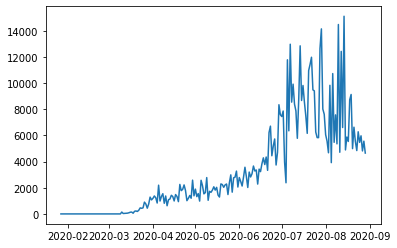

In [51]:
plt.plot(cal['date'], cal['Confirmed_daily'])

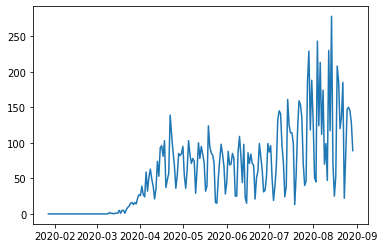

In [52]:
plt.plot(cal['date'], cal['Deaths_daily'])

In [55]:
cal.fillna(0, inplace=True)  # 결측 첫행 보간 
cal.head()

,date,Confirmed,Deaths,Confirmed_daily,Deaths_daily
0,2020-01-26,2.0,0.0,0.0,0.0
1,2020-01-27,2.0,0.0,0.0,0.0
2,2020-01-28,2.0,0.0,0.0,0.0
3,2020-01-29,2.0,0.0,0.0,0.0
4,2020-01-30,2.0,0.0,0.0,0.0


In [56]:
cal.to_csv(path + 'california_covid.csv')  
# 깃헙 주소 : https://raw.githubusercontent.com/YoonHanho/adp_r/main/california_covid.csv

In [57]:
cal.tail()

,date,Confirmed,Deaths,Confirmed_daily,Deaths_daily
212,2020-08-25,681032.0,12382.0,5471.0,147.0
213,2020-08-26,687004.0,12532.0,5972.0,150.0
214,2020-08-27,691821.0,12677.0,4817.0,145.0
215,2020-08-28,697385.0,12805.0,5564.0,128.0
216,2020-08-29,702038.0,12894.0,4653.0,89.0


In [5]:
"""

# 시계열 
library(TTR)
library(forecast)

#### 추후 할 것 
# 1. 분기/시간 등으로 월이 아닌 기간으로 나오는 것 
# 2. 시간 데이터로 변환 : https://dr-hkim.github.io/R-110-Date-Values/
# >> strDates <- c("01/05/1965", "08/16/1975")
# >> dates <- as.Date(strDates, "%m/%d/%Y")
# >> mydates <- as.Date(c("2007-06-22", "2004-02-13"))
# 3. train/test로 나눠서 결과 검증(파이썬에 있음~!!!!)

# 코로나 데이터로 시계열 돌려보기
>> https://www.kaggle.com/code/neelkudu28/covid-19-visualizations-predictions-forecasting

getwd()

df <- read.csv('covid_19_data.csv')
head(df)

table( df$Province.State )

# 파이썬에서 데이터 전처리 후 시계열분석만 R에서 진행
library(TTR)
library(forecast)
library(zoo)

cal <- read.csv('california_covid.csv') 
head(cal)
nrow(cal)

sum(is.na(cal$Confirmed_daily))

covid <- ts(cal$Confirmed_daily, frequency = 365, start = c(2020,1,26), end = c(2020,8,29)is)
covid
plot.ts(covid)


# 로그 변환 
covid_log <- log1p(covid)   #### log(0) --> inf 이므로 log1p로 할 것!!!! 
plot.ts(covid_log)


# 차분 
covid_diff1 <- diff(covid_log, differences = 1)
plot.ts(covid_diff1)

# AR, MA 보기 
acf(covid_diff1, lag.max = 20)
pacf(covid_diff1, lag.max = 20)

auto.arima(covid)  >> ARIMA(3,1,4)

covid_arima <- arima(covid, order = c(3,1,4))
covid_fcast <- forecast(covid_arima, h=50)
plot(covid_fcast)
covid_fcast


#### 여기가 찐!!!!!!
#### 일자별 데이터는 ts 대신 zoo를 활용한다!!! auto.arima로 한방에 본다!!!!
#### zoo 라이브러리 활용하는 법
# https://stackoverflow.com/questions/33128865/starting-a-daily-time-series-in-r

# Confirmed_daily
inds <- seq(as.Date("2020-01-26"), as.Date("2020-08-29"), by = "day")
myzoo <- zoo(cal$Confirmed_daily, inds)
myzoo
plot(myzoo)

fit <- auto.arima(myzoo) ## forecast for next 60 time points fore <- forecast(fit, h = 60)
fit
fore <- forecast(fit, h=60)
plot(fore)

# 차트 X축을 날짜 형식으로 표현 (분기 단위)
plot(fore, xaxt = "n", main = "Corona Confirmed Daily in California")    # no x-axis 
Axis(inds, side = 1,
     at = seq(inds[1], tail(inds, 1) + 60, by = "3 months"),
     format = "%b %Y")

# Deaths_daily
inds <- seq(as.Date("2020-01-26"), as.Date("2020-08-29"), by = "day")
myzoo <- zoo(cal$Deaths_daily, inds)
myzoo
plot(myzoo)

fit <- auto.arima(myzoo) ## forecast for next 60 time points fore <- forecast(fit, h = 60)
fit
fore <- forecast(fit, h=60)
plot(fore)

plot(fore, xaxt = "n", main = "Corona Deaths Daily in California")    # no x-axis 
Axis(inds, side = 1,
     at = seq(inds[1], tail(inds, 1) + 60, by = "3 months"),
     format = "%b %Y")
""";

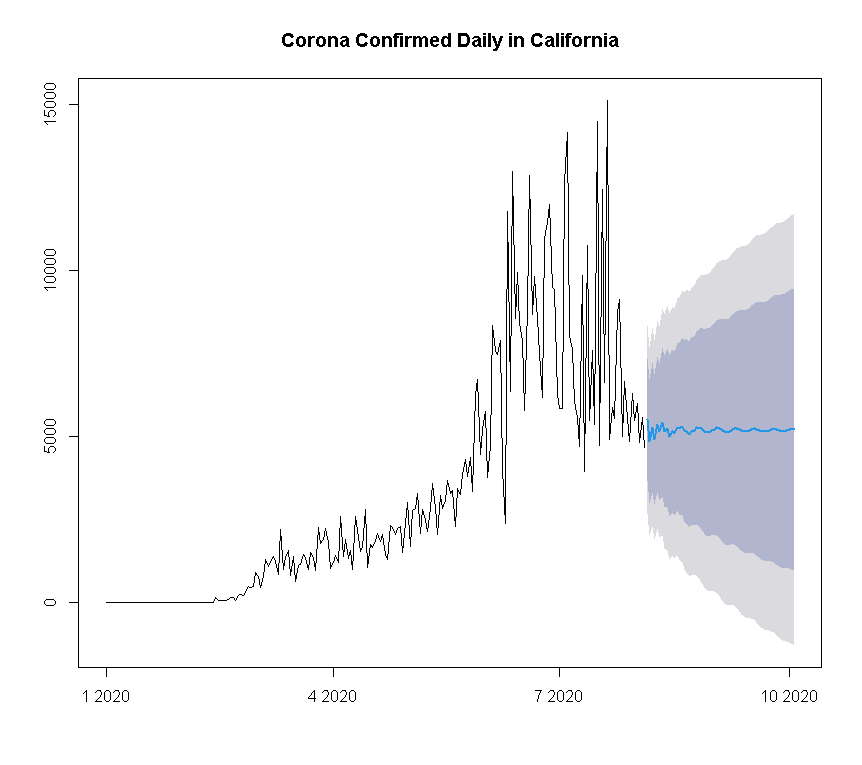

In [9]:
Image('코로나_confirmed.png')

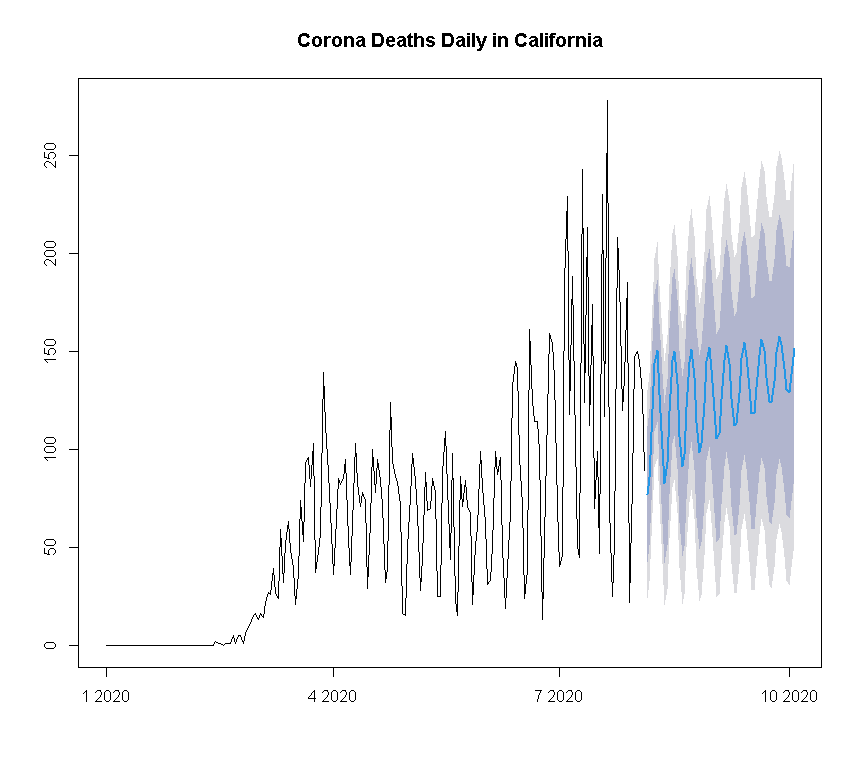

In [10]:
Image('코로나 Deaths.png')